<a href="https://colab.research.google.com/github/Val3nt-ML/Kaggle-Competitions/blob/master/Kaggle_Houses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kaggle: House Prices**






*Import du Drive et des Data*

In [0]:
from google.colab import drive
import sys
drive.mount('/content/gdrive')
!nvcc --version
#!ls /content/gdrive/My\ Drive/collaborative-rnn/*.py
#!cat '/content/gdrive/My Drive/collaborative-rnn/crnn.py'
sys.path.append('/content/gdrive/My Drive/Kaggle/House Prices/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130


*Import des librairies*

In [0]:
import pandas as pd
pd.set_option('display.max_columns', 81)
pd.set_option('display.max_rows', 81)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from xgboost import XGBClassifier
from sklearn import preprocessing, metrics, svm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import roc_curve
from sklearn.utils import resample, shuffle
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, VotingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

## **Data Processing**

In [0]:
train=pd.read_csv("/content/gdrive/My Drive/Kaggle/House Prices/train.csv")
test=pd.read_csv("/content/gdrive/My Drive/Kaggle/House Prices/test.csv")


print("Training Shape: "+str(train.shape))
print("Test Shape: "+str(test.shape))
df=pd.concat([train,test], sort=False)
print("DataFrame Shape: "+str(df.shape))

Training Shape: (1460, 81)
Test Shape: (1459, 80)
DataFrame Shape: (2919, 81)


In [0]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [0]:
pd.DataFrame(df.dtypes)

,0
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
Street,object
Alley,object
LotShape,object
LandContour,object
Utilities,object


In [0]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


## **Identification des Outliers**

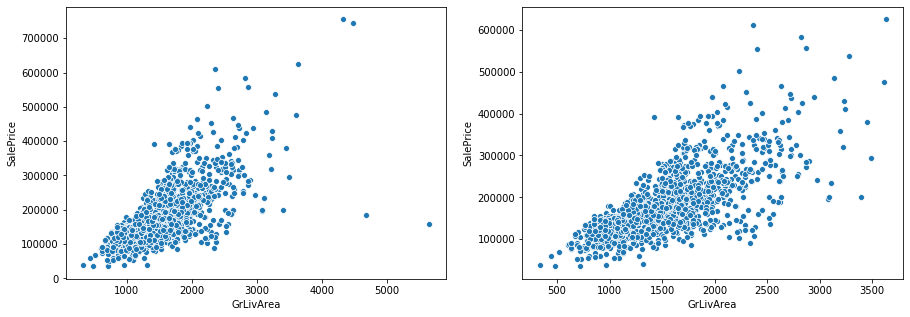

In [0]:
fig= plt.figure(figsize=(15,5))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)


sns.scatterplot(x='GrLivArea', y='SalePrice', data=df, ax=ax1)

df2=df.drop(df[df.GrLivArea>4000].index, inplace=False)
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df2, ax=ax2)


Supression des maisons ayant un GrLivArea >4000 square feet

# **Valeurs Manquantes**

In [0]:

def display_Nan():
  t=pd.DataFrame(df.isna().sum())

  for i,j in t.iterrows():
    if(t.loc[i].values[0]==0):
      t.drop(i, axis=0, inplace=True)
  t=t.rename({0:'Number of NaN'}, axis=1)
  print('Number of Variables with Missing Values: '+str(t.shape[0]))
  return(t)

d=display_Nan()
d.head(d.shape[0])


Number of Variables with Missing Values: 35


,Number of NaN
MSZoning,4
LotFrontage,486
Alley,2721
Utilities,2
Exterior1st,1
Exterior2nd,1
MasVnrType,24
MasVnrArea,23
BsmtQual,81
BsmtCond,82


### **Variable MSZoning**

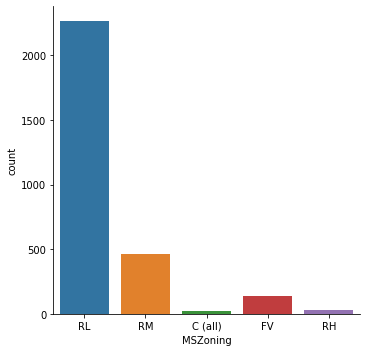

In [0]:
sns.catplot(x='MSZoning', kind="count", data=df)

Classe Majoritaire 'RL', un traitement simple peut être de remplacer les Missing values par 'RL'.

In [0]:
def process_MSZoning():    
  global df
  df.MSZoning.fillna('RL', inplace=True)
  return df
df=process_MSZoning()


### **Variable LotFrontage**

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


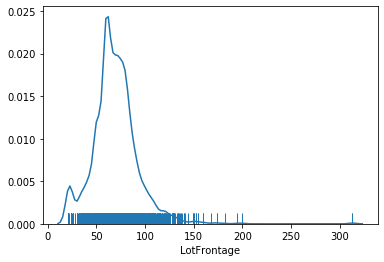

In [0]:
sns.distplot(df['LotFrontage'], hist=False, rug=True);

In [0]:
def process_LotFrontage():    
  global df
  df.LotFrontage.fillna(df.iloc[:1460].LotFrontage.median(), inplace=True)
  return df
df=process_LotFrontage()

### **Variable Alley**

94% des données de cette variable sont manquantes => On peut faire le choix de supprimer la variable.

In [0]:
df.drop(columns=["Alley"], inplace=True)
print(df.shape)

(2919, 80)


### **Variable Utilities**

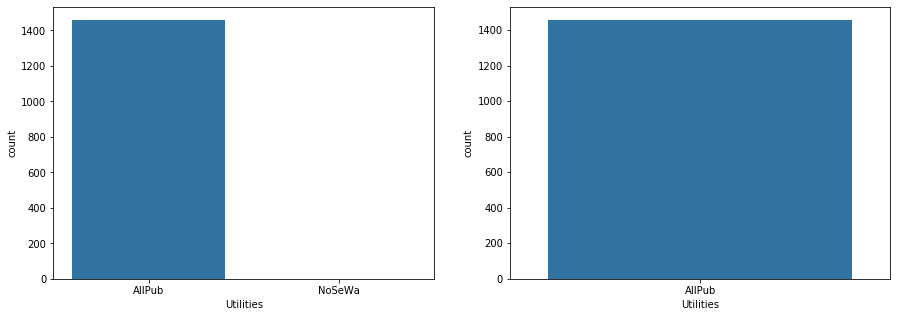

In [0]:
#f, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
fig= plt.figure(figsize=(15,5))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
sns.catplot(x='Utilities', kind="count", data=df[:1460], ax=ax1)
sns.catplot(x='Utilities', kind="count", data=df[1460:], ax=ax2)
plt.close(2)
plt.close(3)


On peut remarquer que la variable 'Utilies' possède 2 valeurs : AllPub et NoSeWa. Cependant, dans le TestSet, seule la valeur AllPub est considérée. Ainsi on peut supprimer cette variable puisque celle)ci est constante au sein des deux sets.

In [0]:
df.drop(columns=['Utilities'], inplace=True)
df.shape

(2919, 79)

### **Variable MasVnrType**

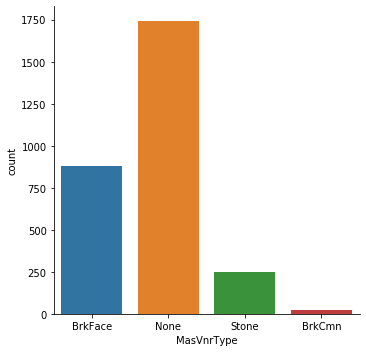

In [0]:
sns.catplot(x="MasVnrType", kind="count", data=df)

In [0]:
def process_MasVnrType():
  global df
  df.MasVnrType.fillna('None', inplace=True)
  return df

df=process_MasVnrType()

### **Variable MasVnrArea**

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


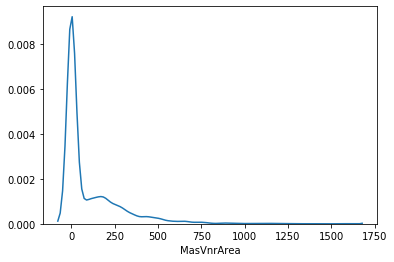

In [0]:
sns.distplot(df['MasVnrArea'], hist=False);

In [0]:
def process_MasVnrArea():
  global df
  df.MasVnrArea.fillna(df[:1460].MasVnrArea.median(), inplace=True)
  return(df)

df=process_MasVnrArea()

In [0]:
"""
corr=df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,20))
sns.heatmap(corr, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
"""

'\ncorr=df.corr()\n# Generate a mask for the upper triangle\nmask = np.zeros_like(corr, dtype=np.bool)\nmask[np.triu_indices_from(mask)] = True\nplt.figure(figsize=(20,20))\nsns.heatmap(corr, vmax=.3, center=0,\n            square=True, linewidths=.5, cbar_kws={"shrink": .5})\n'

In [0]:
print("Valeurs Manquantes du DF: \n")
df.isna().sum()

Valeurs Manquantes du DF: 



Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
LotShape            0
LandContour         0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBa

### **Variable MSZoning**


In [0]:
MS=pd.DataFrame(index=['Number'],columns=df['MSZoning'].unique())
for col in MS.columns:
  MS[col]=df['MSZoning'][df['MSZoning']==col].count()
MS['Total']=df['MSZoning'][df['MSZoning'].isna()==False].count()

MS.head()

,RL,RM,C (all),FV,RH,Total
Number,2269,460,25,139,26,2919


**Supression des Variables dont le nombre de valeurs manquantes est >=70% du nombre de données**

In [0]:
for col in df.columns:
  if (df.isna().sum()[col]>=0.7*df.shape[0]):
    df.drop(columns=[col], inplace=True)
    print("Variable "+col+ " dropped !")

Variable PoolQC dropped !
Variable Fence dropped !
Variable MiscFeature dropped !


### **Variables Bsmt**

In [0]:
print(train.BsmtExposure.isnull().sum())
print(train.BsmtFinType2.isnull().sum())
print(train.BsmtFinType1.isnull().sum())
print(train.BsmtCond.isnull().sum())
print(train.BsmtQual.isnull().sum())

38
38
37
37
37


In [0]:
train.TotalBsmtSF.value_counts().head()

0       37
864     35
672     17
912     15
1040    14
Name: TotalBsmtSF, dtype: int64

In [0]:
df['BsmtFinType2']=df['BsmtFinType2'].fillna('NB')
df['BsmtFinType1']=df['BsmtFinType1'].fillna('NB')
df['BsmtCond']=df['BsmtCond'].fillna('NB')
df['BsmtQual']=df['BsmtQual'].fillna('NB')
df['BsmtExposure']=df['BsmtExposure'].fillna('NB')

### **Variables FirePlaces**

In [0]:
df[['Fireplaces','FireplaceQu']].head(10)

,Fireplaces,FireplaceQu
0,0,NaN
1,1,TA
2,1,TA
3,1,Gd
4,1,TA
5,0,NaN
6,1,Gd
7,2,TA
8,2,TA
9,2,TA


On peut remarquer que les données ayant un Fireplaces==0 ont un FirePlaceQu à NaN.

In [0]:
print(df['Fireplaces'].value_counts())
print(df['FireplaceQu'].isna().sum())

0    1420
1    1268
2     219
3      11
4       1
Name: Fireplaces, dtype: int64
1420


In [0]:
df['FireplaceQu']=df['FireplaceQu'].fillna('NF')

### **Variables Garage**

In [0]:
df['GarageArea'][:1460].value_counts().head()

0.0      81
440.0    49
576.0    47
240.0    38
484.0    34
Name: GarageArea, dtype: int64

In [0]:
print(df['GarageType'][:1460].isnull().sum())
print(df['GarageCond'][:1460].isnull().sum())
print(df['GarageFinish'][:1460].isnull().sum())
print(df['GarageYrBlt'][:1460].isnull().sum())
print(df['GarageQual'][:1460].isnull().sum())

81
81
81
81
81


On peut remarquer qu'il y a 81 données n'ayant pas de Garage (GarageArea==0), et il y a également 81 données n'ayant pas de variables Type, Cond, Finish, YrBlt et Qual. On peut donc en déduire qu'il s'agit des mêmes données et que les NaN correspondent à des données n'ayant pas de garage.

In [0]:
df['GarageType']=df['GarageType'].fillna('NG')
df['GarageCond']=df['GarageCond'].fillna('NG')
df['GarageFinish']=df['GarageFinish'].fillna('NG')
df['GarageYrBlt']=df['GarageYrBlt'].fillna('NG')
df['GarageQual']=df['GarageQual'].fillna('NG')

### **Variable Electrical**

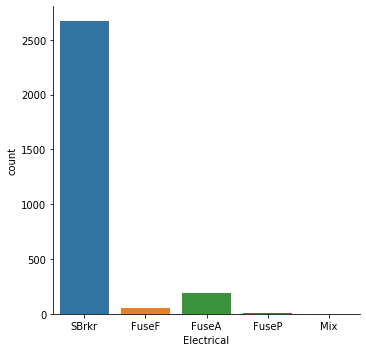

In [0]:
sns.catplot(x='Electrical', kind='count', data=df)

Classe SBrkr largement majoritaire...

In [0]:
df.Electrical.fillna(value="SBrkr", inplace=True)

In [0]:
print("Valeurs Manquantes du DF: \n")
df.isna().sum()

Valeurs Manquantes du DF: 



Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
LotShape            0
LandContour         0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          1
BsmtFinType2        0
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBa

## **On peut remarquer que certains champs du Test Set sont encore manquants...**

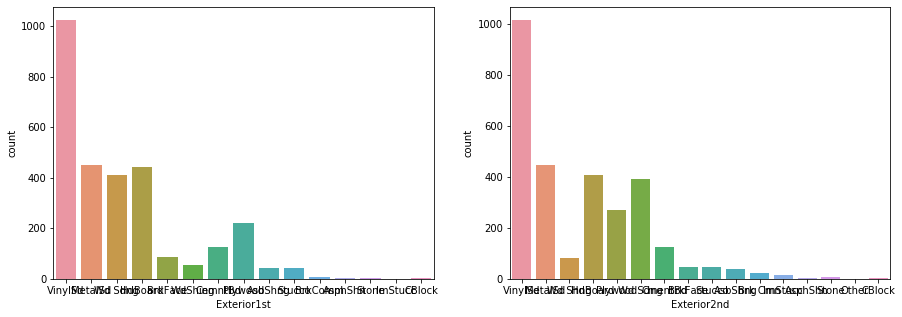

In [0]:
#print(df['ExterCond','Exterior1st', 'Exterior2nd'][df['Exterior1st'].isna()==True or df['Exterior2nd'].isna()==True])
fig= plt.figure(figsize=(15,5))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

df.iloc[np.where(df['Exterior1st'].isna())[0], :]
sns.catplot(x='Exterior1st', kind='count', data=df, ax=ax1)
sns.catplot(x='Exterior2nd', kind='count', data=df, ax=ax2)
plt.close(2)
plt.close(3)

In [0]:
df.Exterior1st.fillna(value="VinylSd", inplace=True)
df.Exterior2nd.fillna(value="VinylSd", inplace=True)

In [0]:
df.iloc[np.where(df['TotalBsmtSF'].isna())[0], :]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
660,2121,20,RM,99.0,5940,Pave,IR1,Lvl,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NB,NB,NB,NB,NaN,NB,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NF,Detchd,1946,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,0,4,2008,ConLD,Abnorml,NaN


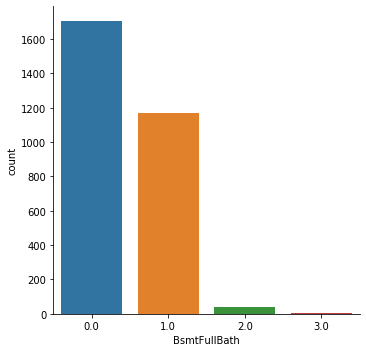

In [0]:
sns.catplot(x='BsmtFullBath', kind='count', data=df)

In [0]:
df['TotalBsmtSF']=df['TotalBsmtSF'].fillna(value=0)
df['BsmtFinSF1']=df['BsmtFinSF1'].fillna(value='NB')
df['BsmtFinSF2']=df['BsmtFinSF2'].fillna(value='NB')
df['BsmtUnfSF']=df['BsmtUnfSF'].fillna(value='NB')

df['BsmtFullBath']=df['BsmtFullBath'].fillna(value=0)
df['BsmtHalfBath']=df['BsmtHalfBath'].fillna(value=0)

In [0]:
for col in df.columns:
  if(col!='SalePrice'):
    df[col]=df[col].fillna(method='bfill')
    

## **Features Selection**

In [0]:
df_d = pd.get_dummies(df)
x_train_df = df_d[:1460].drop(['SalePrice'], axis = 1)
x_train_df.drop(['Id'], axis=1, inplace=True)

y_train = df_d[:1460].SalePrice
print(df_d.shape)
print(x_train_df.shape)
df_d.head(2)

(2919, 2786)
(1460, 2784)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,...,GarageYrBlt_2007.0,GarageYrBlt_2008.0,GarageYrBlt_2009.0,GarageYrBlt_2010.0,GarageYrBlt_2207.0,GarageYrBlt_NG,GarageFinish_Fin,GarageFinish_NG,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_NG,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_NG,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2.0,548.0,0,61,0,0,0,0,0,2,2008,208500.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,2.0,460.0,298,0,0,0,0,0,0,5,2007,181500.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [0]:
scaler1 = StandardScaler()
scaler1.fit(x_train_df)          
t_train = scaler1.transform(x_train_df)

##Normalisation de la sortie dans le cadre d'une Regression Logistique
"""
scaler2=MinMaxScaler()
y_train=scaler2.fit_transform(np.asarray(y_train).reshape(-1,1))
print(t_train)
print(y_train[:5])
"""

'\nscaler2=MinMaxScaler()\ny_train=scaler2.fit_transform(np.asarray(y_train).reshape(-1,1))\nprint(t_train)\nprint(y_train[:5])\n'

### **Analyse en Composantes Principales**

In [0]:
from sklearn.decomposition import PCA

pca_hp = PCA(30)
pca_hp2 = PCA(500)
X_fit = pca_hp.fit_transform(x_train_df)
X_fit100=pca_hp2.fit_transform(x_train_df)
print(X_fit.shape)

X_scaler = MinMaxScaler(feature_range=(-1,1))
Y_scaler = MinMaxScaler(feature_range=(0,1))
X_fit_scaled=X_scaler.fit_transform(X_fit)


y_reshaped=np.asarray(y_train).reshape(-1,1)
Y_scaler.fit(y_reshaped)
y_fit_scaled=Y_scaler.transform(y_reshaped)

print(X_fit_scaled.shape)
print(y_fit_scaled.shape)


(1460, 30)
(1460, 30)
(1460, 1)


## **X_Train, y_train & X_test ...**

# **Machine Learning Models**

In [0]:
def compute_score(clf, scoring='rmse', x_train=X_fit, y_train=y_train):

    #X_train , X_test, y_train, y_test = train_test_split(X_fit, y, test_size=0.20, random_state=42)
    
    mse_xval = cross_val_score(clf, x_train, y_train, cv = 5, scoring='neg_mean_squared_error')
    mae_xval = cross_val_score(clf, x_train, y_train, cv = 5, scoring='neg_mean_absolute_error')
    r2_xval = cross_val_score(clf, x_train, y_train, cv = 5, scoring='r2')

    results=[-np.mean(mae_xval),
             np.sqrt(-np.mean(mse_xval)),
             np.mean(r2_xval)]
    print('Mean Absolute Error: %.2f'% results[0]) 
    print('Root Mean Squared Error: %.2f'% results[1])
    print('R2 score: %.2f' % results[2])
    return results

**Linear Regression**

In [0]:
LinR=LinearRegression()
#Entrainement du modèle
LinR.fit(X_fit, y_train)

scores_linr=compute_score(LinR)

Mean Absolute Error: 20129.35
Root Mean Squared Error: 34569.55
R2 score: 0.81


**S.V.M.**

In [0]:
from sklearn.svm import SVR

svm = SVR(gamma= 'auto') 
#Entrainement du modèle
svm.fit(X_fit, y_train)
#Obtention des scores
scores_svm=compute_score(svm)

Mean Absolute Error: 55558.34
Root Mean Squared Error: 81391.88
R2 score: -0.05


**Random Forest**

In [0]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor 

rf = RandomForestRegressor(n_estimators=50, max_features='sqrt' , criterion= 'mse', max_depth=30, random_state=42) 
#Entrainement du modèle
rf.fit(X_fit, y_train)
#Obtention des scores
scores_rf=compute_score(rf)

Mean Absolute Error: 22875.01
Root Mean Squared Error: 39137.84
R2 score: 0.76


In [0]:
best_params_rf=run_GS(model='RandomForest', run_gs=True)

NameError: ignored

In [0]:
scores_rf_gs=run_GS(model='RandomForest',run_gs=False, parameters=best_params_rf)

**M.L.P.**

In [0]:
from sklearn.neural_network import MLPRegressor
mlp=MLPRegressor(hidden_layer_sizes=(30,20,10,),
                                       activation='tanh',
                                       solver='adam',
                                       batch_size=int(0.05*1460),
                                       learning_rate='adaptive',
                                       max_iter=2000,
                                       learning_rate_init=0.01,
                                       alpha=0.01)
#Entrainement du modèle
mlp.fit(X_fit_scaled, y_fit_scaled)
scores_mlp=compute_score(mlp, x_train=X_fit_scaled, y_train= y_fit_scaled)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d

Mean Absolute Error: 0.03
Root Mean Squared Error: 0.04
R2 score: 0.81


In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics
from keras.wrappers.scikit_learn import KerasRegressor

def create_model():
  model=Sequential()
  model.add(Dense(30, activation='tanh', input_dim=30))
  model.add(Dense(15, activation='tanh'))
  #model.add(Dense(10, activation='tanh'))
  model.add(Dense(1, activation='tanh'))
  model.compile(loss='mean_squared_error', optimizer='adam', metrics=[metrics.mean_squared_error])
  return (model)

#model.fit(X_fit, y_train, batch_size=int(0.005*X_fit.shape[0]), epochs=100, validation_split=0.2)

model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=int(0.005*X_fit.shape[0]), verbose=0)
model.fit(X_fit, y_train)


Using TensorFlow backend.


In [0]:
compute_score(model)

**GradientBoosting**

In [0]:
from sklearn.ensemble import GradientBoostingRegressor

Gb = GradientBoostingRegressor(loss='ls', n_estimators=80)
Gb.fit(x_train_df, y_train)
scores_Gb=compute_score(Gb)

**XG Boost**

In [0]:
from xgboost import XGBRegressor
XGb = XGBRegressor()
XGb.fit(t_train, y_train)
scores_XGb=compute_score(XGb)

In [0]:
feature_importances = pd.DataFrame(XGb.feature_importances_,
                                   index = x_train_df.columns,
columns=['importance']). sort_values('importance', ascending=False)

feature_importances[:50].plot(kind='bar',figsize=(25,8),rot =45)

In [0]:
best_params_xgb=run_GS(model='XGBoost',run_gs=True)

In [0]:
scores_XGb_gs=run_GS(model='XGBoost',run_gs=False, parameters=best_params_xgb)

## **Grid Search**

In [0]:
# turn run_gs to True if you want to run the gridsearch again.
def run_GS(model, run_gs=False, parameters={}, X_train=X_fit):

  if run_gs:

    #XG Boost
    if(model=='XGBoost'):
      parameter_grid = {
                  'booster': ['gbtree'],
                  'silent': [1],
                  'eta': [0.001, 0.01, 0.1],
                  'max_depth': [3, 6, 10],
                  'subsample': [0.8],
                  'colsample_bytree' : [1],
                  'gamma' : [1]
                  }
      regressor = XGBRegressor()
    
    #Random Forest
    elif(model=='RandomForest'):
      parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [20, 50, 100],
                 'criterion': ['mse'],
                 'max_features': ['auto'],
                 #'min_samples_split': [2, 3, 10],
                 #'min_samples_leaf': [1, 3, 10],
                 #'bootstrap': [True, False],
                  }
      regressor = RandomForestRegressor()

    cross_validation = StratifiedKFold(n_splits=5)

    grid_search = GridSearchCV(regressor,
                                scoring='neg_mean_squared_error',
                                param_grid=parameter_grid,
                                cv=cross_validation,
                                verbose=1
                                )
    grid_search.fit(X_train, y_train)

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    return(grid_search.best_params_)
      
  else: 
    #XG Boost
    if(model=='XGBoost'):
      regressor=XGBRegressor(**parameters)
    #Random Forest
    elif(model=='RandomForest'):
      regressor=RandomForestRegressor(**parameters)

    regressor.fit(X_train, y_train)
    scores=compute_score(regressor)
    return(scores)

## **Modèle Ensembliste**

In [0]:
from sklearn.ensemble import VotingRegressor

xgb_ens=XGBRegressor()
rf_ens= RandomForestRegressor(**best_params_rf)
gb_ens= GradientBoostingRegressor(loss='ls', n_estimators=80)
#linr_ens=LinearRegression()

estimators=[]
estimators.append(('XGBoost', xgb_ens))
estimators.append(('Random Forest', rf_ens))
estimators.append(('Gradient Boosting', gb_ens))
ensemble = VotingRegressor(estimators, weights=[0.7,0.15, 0.15])
ensemble.fit(X_fit, y_train)
scores_ens= compute_score(ensemble)

# **Ranking des modèles de Machine Learning**

In [0]:
models = pd.DataFrame({
    'Model': ['Linear Regression','Support Vector Machine', 'Random Forest','Random Forest GS','Gradient Boosting','XG Boost', 'XG Boost GS', 'Ensemble'],
    'RMSE score': [scores_linr[1], scores_svm[1], scores_rf[1], scores_rf_gs[1], scores_Gb[1], scores_XGb[1], scores_XGb_gs[1] ,scores_ens[1]],
    'MAE score': [scores_linr[0], scores_svm[0], scores_rf[0], scores_rf_gs[0], scores_Gb[0], scores_XGb[0], scores_XGb_gs[0], scores_ens[0]],
    'R2 score':  [scores_linr[2], scores_svm[2], scores_rf[2], scores_rf_gs[2], scores_Gb[2], scores_XGb[2], scores_XGb_gs[2], scores_ens[2]]})
models.sort_values(by='RMSE score', ascending=True)

# **Upload des Résultats**


In [0]:
x_test_df = df_d[1460:].drop(['SalePrice'], axis = 1)
x_test_df.drop(['Id'], axis = 1, inplace=True)
x_test2=scaler1.transform(x_test_df)
X_test = pca_hp.fit_transform(x_test2)

predictions=ensemble.predict(X_test)

In [0]:
#Create a  DataFrame with the passengers ids and our prediction regarding whether they survived or not
submission = pd.DataFrame({'Id':df_d['Id'][1460:],'SalePrice':predictions})
#submission['SalePrice']=submission['SalePrice'].apply(int)
#Visualize the first 5 rows
print(submission.head(5))


#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'House Prices Predictions_Ensemble.csv'

submission.to_csv("/content/gdrive/My Drive/Kaggle/House Prices/"+filename,index=False)

print('Saved file: ' + filename)